# Introduction

Sampling is an important technique in Machine Learning.

# The law of unconscious statistican

First, let's review how we calculate the expectation of a random variable $x$.

For a continuous variable, it is calculated by:
$\mathbb{E}[x] = \int xp(x)dx$

For a discrete variable:
$\mathbb{E}[x] = \sum xp(x)$

Now we have $y=f(x)$, y represents a transformation of the random variable x, and y is also a random variable, but y **does not** have the same distribution of x.

The question is: **what is the expection of y?**

Method 1: **substition**

We can substitute y into first equation, $\mathbb{E}[y] = \int yp(y)dy$.

This requires us to derive the distribution of y or $f(x)$, which is possible if the transformation is simple and easy to calculate.



Method 2: **The law of unconscious stasitican**

This law states that, you don't need to explicitly calculate the distribution of $f(x)$, you only need to sample from the original random variable x.


$\mathbb{E}[f(x)] = \int f(x)p(x)dx$

Or in discrete form:

$\mathbb{E}[f(x)] = \sum f(x)p(x)$


More generally, for calculating any integral:

$F = \int f(x)dx$

We can estimate F by:

$\hat{F}_n =\frac{1}{n}\sum_n \frac{f(x_i)}{p(x_i)}$, where $x_i \sim p(x)$

**This means we can estimate any integral by sampling from any distribution p(x) of x**.



Reference:

1. [Mathematical Foundations of Monte Carlo Methods
](https://www.scratchapixel.com/lessons/mathematics-physics-for-computer-graphics/monte-carlo-methods-mathematical-foundations/expected-value-of-the-function-of-a-random-variable)
2. [Monte Carlo Methods in Practice
](https://www.scratchapixel.com/lessons/mathematics-physics-for-computer-graphics/monte-carlo-methods-in-practice/monte-carlo-integration)
3. [UvA deep learning course slide](https://uvadlc.github.io/lectures/nov2019/lecture9.pdf)


## Example

In [219]:
import scipy.integrate as integrate
import numpy as np

# quad means quadrature calculating area, aka integral for historical reasons

# lets calcuate integal of f(x^2) from [0, 4], which is 8.

upper_bound = 8
lower_bound = 1
def f(x):
    return x**2

res = integrate.quad(f, lower_bound, upper_bound)
# if we solve it analytically, we have x^3/3, expected result is 8/3
print(res[0])

170.33333333333331


In [215]:
import matplotlib.pyplot as plt

184.625
176.6851851851852
170.91077441077442
170.6206030150754
170.44789579158316
170.41511683357177
170.39055722389057


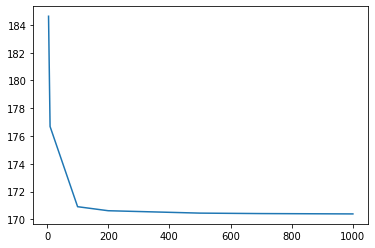

In [220]:

# monte carlo
# suppose p(x) = 1/2, i.e. p(x) is a uniform distribution for x in [0, 2]
ns = [5, 10, 100, 200, 500, 700, 1000]
f_hats = []
for n in ns:
    samples = np.linspace(lower_bound, upper_bound, n)

    all_sum = []
    for xi in samples:
        all_sum.append(f(xi) / (1/(upper_bound-lower_bound)))
    f_hat = np.sum(all_sum)/ n
    print(f_hat)

    f_hats.append(f_hat)
plt.plot(ns, f_hats);

As we can see, the estimation is getting more and more accurate when n increases

One might ask, how about a different distribution of $p(x)$? Let's try a normal distribution.

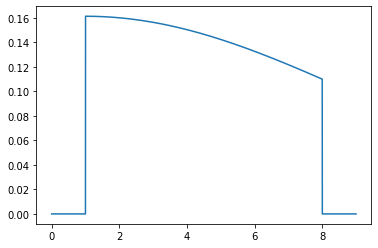

In [221]:
# monte carlo
# suppose p(x) is a truncated normal distribution for x in [0, 2]
from scipy.stats import truncnorm
from scipy.stats import norm

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
# be a bit careful with setting the mean and sd, 
# extreme values might cause numerical unstability, cause off estimations
trunc_norm = get_truncated_normal(mean=lower_bound, sd=upper_bound, low=lower_bound, upp=upper_bound)
# how does the truncate norm look like?
xx = np.linspace(lower_bound-1, upper_bound+1, 10000)
yy = trunc_norm.pdf(xx)
plt.plot(xx, yy)

150.05717363816441
171.3243051305737
171.6596343793269
173.7753948335888
169.95192639233971
170.44640597063957
169.99766353683617


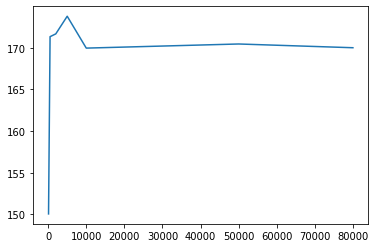

In [222]:
ns = [100, 500, 2000,  5000, 10000, 50000, 80000]
f_hats = []

for n in ns:
    # draw samples
    samples = trunc_norm.rvs(n)
    all_sum = []
    
    for xi in samples:
        all_sum.append(f(xi) / trunc_norm.pdf(xi) )
    f_hat = np.sum(all_sum)/ n
    print(f_hat)
    f_hats.append(f_hat)
plt.plot(ns, f_hats);